![Research Work](https://pbs.twimg.com/media/FSldRhmXwBAGLbR?format=jpg&name=medium)

Random Forrest is a supervised algorithm used for both classification and regression problems too. We can see it from a supervised algorithm to create a forest in some way & make it random. The larger the number of trees the more accurate results.

[Click to see my article on Random Forrest](https://medium.com/machine-learning-researcher/random-forest-algorithm-in-machine-learning-b15906b33157)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>
<b> Heart Failure Prediction: </b>This database contains 76 attributes, but all published experiments refer to using a subset of 12 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 
The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

#### Attribute Information
`Age:` age of the patient [years] <br>
`Sex:` sex of the patient [M: Male, F: Female] <br>
`ChestPainType:` chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] <br>
`RestingBP:` resting blood pressure [mm Hg] <br>
`Cholesterol:` serum cholesterol [mm/dl] <br>
`FastingBS:` fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br>
`RestingECG:` resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
`MaxHR:` maximum heart rate achieved [Numeric value between 60 and 202] <br>
`ExerciseAngina:` exercise-induced angina [Y: Yes, N: No] <br>
`Oldpeak:` oldpeak = ST [Numeric value measured in depression] <br>
`ST_Slope:` the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] <br>
`HeartDisease:` output class [1: heart disease, 0: Normal] <br>

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


plt.style.use('fivethirtyeight')

#### <font color = blue>Import the Dataset

In [31]:
df = pd.read_csv('Dataset/heart.csv')
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Information </font>

#### <font color = blue>Data shape

In [32]:
df.shape

(918, 12)

#### <font color = blue> Data Info

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### <font color = blue> Data Description

In [34]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### <font color = blue> Categorical cols

In [35]:
# Categorical cols
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [36]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Sex has ['M' 'F'] values

ChestPainType has ['ATA' 'NAP' 'ASY' 'TA'] values

RestingECG has ['Normal' 'ST' 'LVH'] values

ExerciseAngina has ['N' 'Y'] values

ST_Slope has ['Up' 'Flat' 'Down'] values



#### <font color = blue> Numerical cols

In [37]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

#### <font color = blue> Check the Relationship of features

<Figure size 1152x648 with 0 Axes>

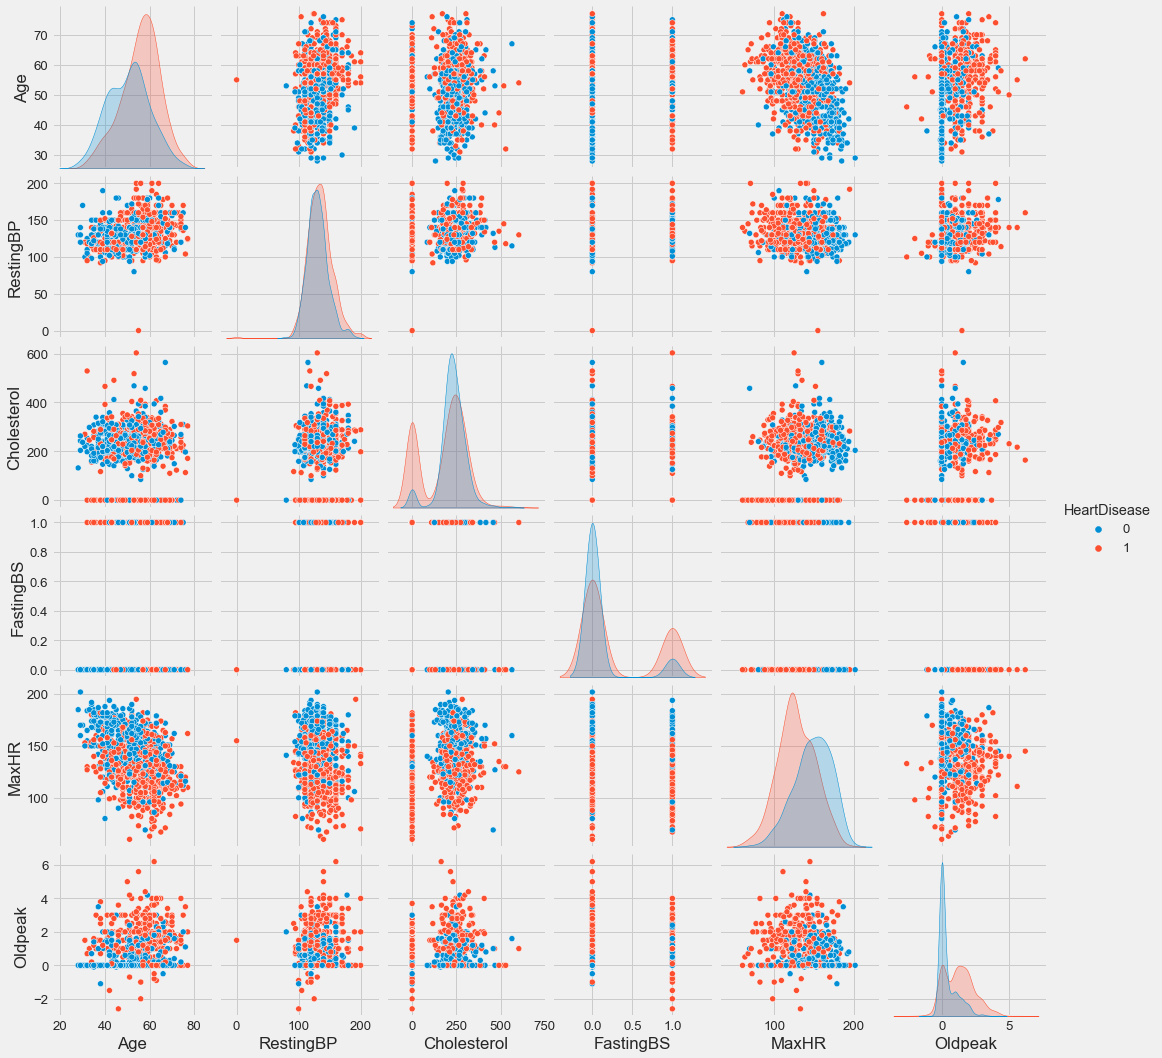

In [38]:
plt.figure(figsize = (16, 9))
sns.pairplot(df, hue = 'HeartDisease')

#### <font color = blue> Check the Correlation of features

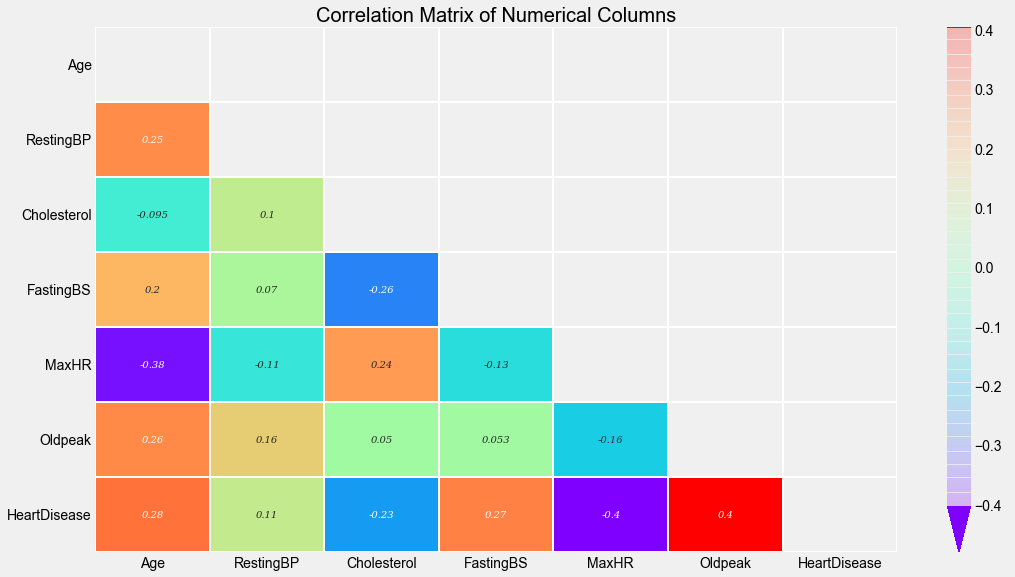

In [11]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of Numerical Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Check the Missing Value </font>

In [39]:
# check if there is any missing value
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Define the Predictor and Target Attribute </font>

In [40]:
X = df.iloc[:, 0:11]
Y = df.iloc[:, -1]

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> One-Hot Encoder </font>

In [41]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Sex has ['M' 'F'] values

ChestPainType has ['ATA' 'NAP' 'ASY' 'TA'] values

RestingECG has ['Normal' 'ST' 'LVH'] values

ExerciseAngina has ['N' 'Y'] values

ST_Slope has ['Up' 'Flat' 'Down'] values



In [42]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Convert into ndarray </font>

In [43]:
type(X)

pandas.core.frame.DataFrame

In [44]:
X= X.to_numpy()
Y = Y.to_numpy()

In [45]:
type(X)

numpy.ndarray

### <font color = #27C3E5> 2.5: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [49]:
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (734, 15)
Y_train (734,)


#### <font color = blue> Testing Data

In [50]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (184, 15)
X_test (184,)


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build Random Forrest Classifier Model </font>
In this part, we build Random Forrest Classifier Model with sklearn.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Import Model from Sklearn 

In [1]:
from sklearn.ensemble import RandomForestClassifier

#### <font color = blue> Initialize the Model

In [119]:
clf = RandomForestClassifier(max_depth = 12, n_estimators = 1000, random_state = 42)

#### <font color = blue> Fit the training Data into Model

In [120]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=1000, random_state=42)

#### <font color = blue> Predict the Test Data</font>

In [121]:
y_pred = clf.predict(X_test)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the Random Forrest model. first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

<AxesSubplot:>

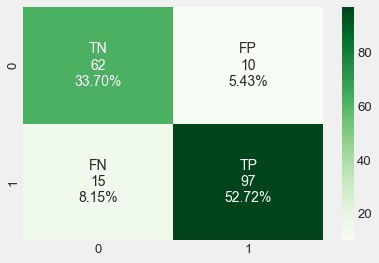

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix_ = confusion_matrix(y_pred, y_test)

#[row, column]
TP = confusion_matrix_[1, 1]        
TN = confusion_matrix_[0, 0]           
FP = confusion_matrix_[0, 1]           
FN = confusion_matrix_[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_.flatten()/np.sum(confusion_matrix_)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_, annot=labels, fmt='', cmap='Greens')

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>4.2.1: Calculate the Results

In [124]:
# Accuracy Score
Accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_pred, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_pred, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_pred, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(y_pred, y_test)
print('ROC Area:', Roc) 

Accuracy Score: 0.8641304347826086
Precision Score: 0.9065420560747663
True positive Rate: 0.8660714285714286
False positive Rate 0.1388888888888889
F1 Score: 0.8858447488584474
Specificity: 0.8611111111111112
Mean Absolute Error: 0.1358695652173913
ROC Area: 0.8635912698412699


#### <font color = blue>4.2.2: Visualize the Results

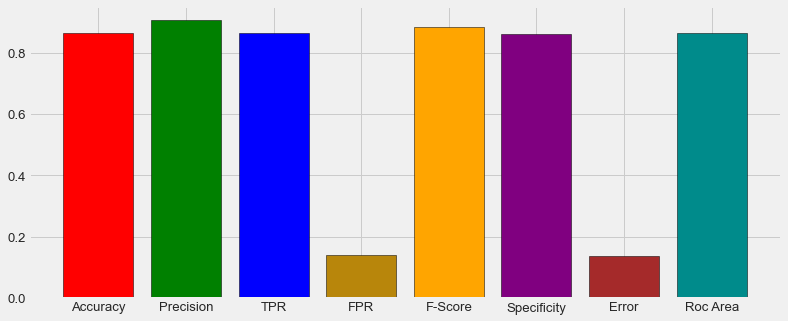

In [125]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali